# Data Dictionary

## Features:

1. **soil_moisture:** The amount of water contained in the soil.
2. **NDBI:** Normalized Difference Built-up Index; used to map urban areas.
3. **BU:** Built-Up; areas that are covered by buildings and other infrastructure.
4. **Roughness:** A measure of the surface texture or irregularities.
5. **Slope:** The steepness or incline of the terrain.
6. **NDVI:** Normalized Difference Vegetation Index; used to measure live green vegetation.
7. **LST:** Land Surface Temperature; the temperature of the land surface.
8. **UHI:** Urban Heat Island; an urban area that is significantly warmer than its surrounding rural areas.
9. **UTFVI:** Urban Thermal Field Variance Index; used to assess the thermal environment in urban areas.
10. **NDWI:** Normalized Difference Water Index; used to monitor changes in water content.
11. **SAVI:** Soil-Adjusted Vegetation Index; an index used to minimize soil brightness influences on NDVI.
12. **lulc_classes:** Land Use/Land Cover classes; categories describing the usage and coverage of land.
13. **Amenity:** Features that provide comfort, convenience, or enjoyment.
14. **GHI (kWh/m2):** Global Horizontal Irradiance; the total amount of shortwave radiation received from above by a surface horizontal to the ground (in kWh per square meter).
15. **CH4_column_volume_mixing_ratio_dry_air_x:** The concentration of methane in the column of air, dry basis.
16. **CO_column_number_density_x:** The amount of carbon monoxide in the column of air.
17. **tropospheric_HCHO_column_number_density_x:** The amount of formaldehyde in the troposphere.
18. **NO2_column_number_density_x:** The amount of nitrogen dioxide in the column of air.
19. **O3_column_number_density_x:** The amount of ozone in the column of air.
20. **SO2_column_number_density_x:** The amount of sulfur dioxide in the column of air.
21. **CH4_column_volume_mixing_ratio_dry_air_y:** The concentration of methane in the column of air, dry basis.
22. **CO_column_number_density_y:** The amount of carbon monoxide in the column of air.
23. **tropospheric_HCHO_column_number_density_y:** The amount of formaldehyde in the troposphere.
24. **NO2_column_number_density_y:** The amount of nitrogen dioxide in the column of air.
25. **O3_column_number_density_y:** The amount of ozone in the column of air.
26. **SO2_column_number_density_y:** The amount of sulfur dioxide in the column of air.
27. **Longitude:** The east-west position of a point on the Earth's surface.
28. **Latitude:** The north-south position of a point on the Earth's surface.
29. **geometry:** The spatial representation of the data points, typically coordinates or shapes.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Utilities

In [2]:
!pip install pykrige --quiet
#!pip install geopandas --quiet
#!pip install folium --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 909.7/909.7 kB 8.7 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

import json
from pykrige.ok import OrdinaryKriging
from tqdm import tqdm

import geopandas as gpd
from shapely.geometry import Point
import folium
from folium.plugins import MarkerCluster

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# 1. Without Air Quality Data


# Data Preprocessing

In [4]:
zone_4 = pd.read_csv("drive/MyDrive/Omdena-Milan/Task-1/Zone-4/zone_4_v1.csv")


In [ ]:
zone_4.head()

,soil_moisture,NDBI,BU,Roughness,Slope,NDVI,LST,UHI,UTFVI,NDWI,...,SO2_column_number_density_x,CH4_column_volume_mixing_ratio_dry_air_y,CO_column_number_density_y,tropospheric_HCHO_column_number_density_y,NO2_column_number_density_y,O3_column_number_density_y,SO2_column_number_density_y,Longitude,Latitude,geometry
0,125.331552,-0.129746,-0.271251,0.0,89.999694,0.545336,28.333197,-2.657156,-0.199289,-0.567614,...,0.000028,1907.877197,0.033998,0.00011,0.000133,0.142454,0.000028,9.240700,45.419989,POINT (9.240699833152282 45.41998857495235)
1,130.649125,-0.091416,-0.238252,0.0,89.999691,0.705981,27.473296,-3.061812,-0.236826,-0.602588,...,0.000028,1907.877197,0.033998,0.00011,0.000133,0.142454,0.000028,9.240341,45.420168,POINT (9.240340507038631 45.420168238009175)
2,130.643567,-0.112200,-0.245295,0.0,89.999691,0.705981,27.473296,-3.061812,-0.236826,-0.579211,...,0.000028,1907.877197,0.033998,0.00011,0.000133,0.142454,0.000028,9.240520,45.420168,POINT (9.240520170095458 45.42016823800918)
3,195.133153,-0.129746,-0.271251,0.0,89.999694,0.545336,28.333197,-2.657156,-0.199289,-0.560563,...,0.000028,1907.877197,0.033998,0.00011,0.000133,0.142454,0.000028,9.240700,45.420168,POINT (9.240699833152282 45.42016823800918)
4,132.716402,-0.129746,-0.271251,0.0,89.999694,0.545336,28.333197,-2.657156,-0.199289,-0.621918,...,0.000028,1907.877197,0.033998,0.00011,0.000133,0.142454,0.000028,9.240879,45.420168,POINT (9.240879496209104 45.42016823800917)


In [ ]:
zone_4.head().T

,0,1,2,3,4
soil_moisture,125.331552,130.649125,130.643567,195.133153,132.716402
NDBI,-0.129746,-0.091416,-0.1122,-0.129746,-0.129746
BU,-0.271251,-0.238252,-0.245295,-0.271251,-0.271251
Roughness,0.0,0.0,0.0,0.0,0.0
Slope,89.999694,89.999691,89.999691,89.999694,89.999694
NDVI,0.545336,0.705981,0.705981,0.545336,0.545336
LST,28.333197,27.473296,27.473296,28.333197,28.333197
UHI,-2.657156,-3.061812,-3.061812,-2.657156,-2.657156
UTFVI,-0.199289,-0.236826,-0.236826,-0.199289,-0.199289
NDWI,-0.567614,-0.602588,-0.579211,-0.560563,-0.621918


In [ ]:
zone_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868909 entries, 0 to 868908
Data columns (total 30 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   soil_moisture                              868909 non-null  float64
 1   NDBI                                       868909 non-null  float64
 2   BU                                         868909 non-null  float64
 3   Roughness                                  868909 non-null  float64
 4   Slope                                      868909 non-null  float64
 5   NDVI                                       868909 non-null  float64
 6   LST                                        868909 non-null  float64
 7   UHI                                        868909 non-null  float64
 8   UTFVI                                      868909 non-null  float64
 9   NDWI                                       868909 non-null  float64
 10  SAVI    

In [ ]:
zone_4.columns

Index(['soil_moisture', 'NDBI', 'BU', 'Roughness', 'Slope', 'NDVI', 'LST',
       'UHI', 'UTFVI', 'NDWI', 'SAVI', 'lulc_classes', 'Amenity',
       'GHI (kWh/m2)', 'Unnamed: 0.1',
       'CH4_column_volume_mixing_ratio_dry_air_x',
       'CO_column_number_density_x',
       'tropospheric_HCHO_column_number_density_x',
       'NO2_column_number_density_x', 'O3_column_number_density_x',
       'SO2_column_number_density_x',
       'CH4_column_volume_mixing_ratio_dry_air_y',
       'CO_column_number_density_y',
       'tropospheric_HCHO_column_number_density_y',
       'NO2_column_number_density_y', 'O3_column_number_density_y',
       'SO2_column_number_density_y', 'Longitude', 'Latitude', 'geometry'],
      dtype='object')

In [5]:
# We can drop Unnamed: 0.1 column
zone_4.drop("Unnamed: 0.1", axis=1, inplace=True)
zone_4.drop("geometry", axis=1, inplace=True)

In [ ]:
zone_4.shape

(868909, 28)

In [6]:
print("Total number of Columns:", zone_4.shape[1],"\nTotal number of Rows:", zone_4.shape[0])

Total number of Columns: 28 
Total number of Rows: 868909


In [ ]:
zone_4.isnull().sum() #checking for total null values

soil_moisture                                     0
NDBI                                              0
BU                                                0
Roughness                                         0
Slope                                             0
NDVI                                              0
LST                                               0
UHI                                               0
UTFVI                                             0
NDWI                                              0
SAVI                                              0
lulc_classes                                      0
Amenity                                           0
GHI (kWh/m2)                                      0
CH4_column_volume_mixing_ratio_dry_air_x     801000
CO_column_number_density_x                   801000
tropospheric_HCHO_column_number_density_x    801000
NO2_column_number_density_x                  801000
O3_column_number_density_x                   801000
SO2_column_n

In [10]:
# Dropping the air quality columns having null values
zone_4_v2 = zone_4.dropna(axis=1, how='any')

In [ ]:
zone_4_v2.columns

Index(['soil_moisture', 'NDBI', 'BU', 'Roughness', 'Slope', 'NDVI', 'LST',
       'UHI', 'UTFVI', 'NDWI', 'SAVI', 'lulc_classes', 'Amenity',
       'GHI (kWh/m2)', 'Longitude', 'Latitude'],
      dtype='object')

In [ ]:
zone_4_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868909 entries, 0 to 868908
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   soil_moisture  868909 non-null  float64
 1   NDBI           868909 non-null  float64
 2   BU             868909 non-null  float64
 3   Roughness      868909 non-null  float64
 4   Slope          868909 non-null  float64
 5   NDVI           868909 non-null  float64
 6   LST            868909 non-null  float64
 7   UHI            868909 non-null  float64
 8   UTFVI          868909 non-null  float64
 9   NDWI           868909 non-null  float64
 10  SAVI           868909 non-null  float64
 11  lulc_classes   868909 non-null  int64  
 12  Amenity        868909 non-null  object 
 13  GHI (kWh/m2)   868909 non-null  float64
 14  Longitude      868909 non-null  float64
 15  Latitude       868909 non-null  float64
dtypes: float64(14), int64(1), object(1)
memory usage: 106.1+ MB


In [11]:
# Encode the categorical column
zone_4_v2['Amenity'] = pd.Categorical(zone_4_v2['Amenity']).codes

<ipython-input-11-4ac7e3bd7ad0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zone_4_v2['Amenity'] = pd.Categorical(zone_4_v2['Amenity']).codes


In [ ]:
zone_4_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868909 entries, 0 to 868908
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   soil_moisture  868909 non-null  float64
 1   NDBI           868909 non-null  float64
 2   BU             868909 non-null  float64
 3   Roughness      868909 non-null  float64
 4   Slope          868909 non-null  float64
 5   NDVI           868909 non-null  float64
 6   LST            868909 non-null  float64
 7   UHI            868909 non-null  float64
 8   UTFVI          868909 non-null  float64
 9   NDWI           868909 non-null  float64
 10  SAVI           868909 non-null  float64
 11  lulc_classes   868909 non-null  int64  
 12  Amenity        868909 non-null  int8   
 13  GHI (kWh/m2)   868909 non-null  float64
 14  Longitude      868909 non-null  float64
 15  Latitude       868909 non-null  float64
dtypes: float64(14), int64(1), int8(1)
memory usage: 100.3 MB


In [ ]:
zone_4_v2.describe()

,soil_moisture,NDBI,BU,Roughness,Slope,NDVI,LST,UHI,UTFVI,NDWI,SAVI,lulc_classes,Amenity,GHI (kWh/m2),Longitude,Latitude
count,868909.000000,868909.000000,868909.000000,868909.000000,868909.000000,868909.000000,868909.000000,868909.000000,868909.000000,868909.000000,868909.000000,868909.000000,868909.000000,868909.000000,868909.000000,868909.000000
mean,111.294474,-0.069876,-0.177285,1.746991,86.784598,0.422964,33.970484,-0.004334,-0.004392,-0.397558,0.186602,5.307610,27.822301,1417.691789,9.239649,45.448888
std,76.824358,0.053856,0.110104,0.678792,16.669187,0.208369,2.133157,1.003831,0.065930,0.200573,0.109848,1.552965,17.788770,2.569449,0.016402,0.012320
min,-12.841406,-0.202806,-0.553019,0.000000,0.000000,-0.153601,26.834033,-3.362640,-0.266291,-0.779195,-0.018711,0.000000,0.000000,1411.500000,9.203150,45.419989
25%,68.716951,-0.115209,-0.262834,1.321211,89.978163,0.236711,32.823373,-0.544147,-0.035229,-0.588101,0.090273,6.000000,10.000000,1415.700000,9.226866,45.439033
50%,98.082201,-0.072286,-0.159729,1.633666,89.989082,0.413757,34.183731,0.096016,0.005969,-0.397145,0.164393,6.000000,24.000000,1417.700000,9.240161,45.449813
75%,133.637952,-0.026627,-0.084957,2.047358,89.992510,0.613454,35.303523,0.622973,0.037498,-0.224558,0.270939,6.000000,45.000000,1419.800000,9.252917,45.459514
max,2552.962073,0.127096,0.101092,6.194089,89.999826,0.841519,40.764609,3.192878,0.166441,0.445074,0.515364,7.000000,61.000000,1422.100000,9.272680,45.472091


### Normalization

In [12]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(zone_4_v2[['soil_moisture', 'NDBI', 'BU', 'Roughness', 'Slope', 'NDVI', 'LST',
       'UHI', 'UTFVI', 'NDWI', 'SAVI', 'lulc_classes', 'Amenity',
       'GHI (kWh/m2)', 'Longitude', 'Latitude']])
scaled_features

array([[ 0.18271661, -1.11166658, -0.85343334, ...,  1.71562597,
         0.06409086, -2.34574882],
       [ 0.25193392, -0.39995686, -0.55372403, ...,  1.71562597,
         0.04218401, -2.33116554],
       [ 0.25186158, -0.78587028, -0.6176879 , ...,  1.71562597,
         0.05313743, -2.33116554],
       ...,
       [-0.39604588, -0.99217039, -0.90074627, ..., -0.38599304,
         1.96998708,  1.88340286],
       [-0.28380679, -0.99217039, -0.90074627, ..., -0.38599304,
         1.9809405 ,  1.88340286],
       [ 0.13963114, -0.99217039, -0.90074627, ..., -0.38599304,
         1.99189393,  1.88340286]])

**Now all of our variables are scaled to be distributed between 0 and 1.**

# Modelling


## K-Means Clustering
### Elbow Method

In [20]:
inertia = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(scaled_features)
    kmeanModel.fit(scaled_features)
    inertia.append(kmeanModel.inertia_)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

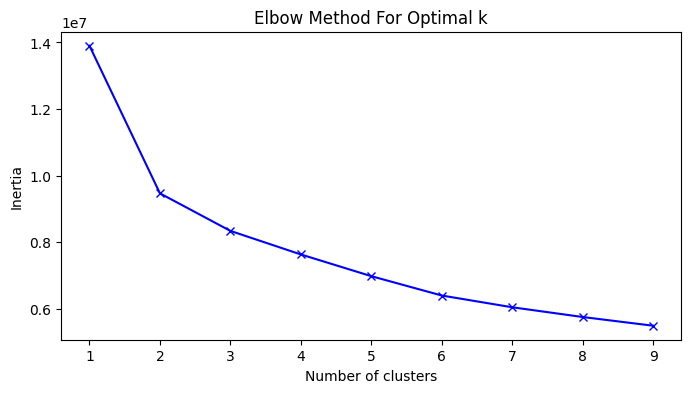

In [21]:
# Plot the elbow method results
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [13]:
# From the elbow plot, choosing the optimal number of clusters:
optimal_clusters = 3

In [14]:
kmeans = KMeans(n_clusters=optimal_clusters).fit(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Evaluation

In [27]:
inertia_1 = kmeans.inertia_
print(f"Inertia: {inertia_1}")

Inertia: 8337022.893132761


In [23]:
labels = kmeans.labels_

In [28]:
ch_score_1 = calinski_harabasz_score(scaled_features, labels)
print(f"Calinski-Harabasz Index: {ch_score_1}")

Calinski-Harabasz Index: 290027.0537876771


In [29]:
db_score_1 = davies_bouldin_score(scaled_features, labels)
print(f"Davies-Bouldin Index: {db_score_1}")

Davies-Bouldin Index: 1.717568214572465


In [ ]:
labels_df = pd.DataFrame(kmeans.labels_) #This is where the label output of the KMeans we just ran lives. Make it a dataframe so we can concatenate back to the original data
labeledData = pd.concat((zone_4_v2,labels_df),axis=1)
labeledData = labeledData.rename({0:'labels'},axis=1)

In [ ]:
labeledData.to_csv('drive/MyDrive/Omdena-Milan/Task-1/Zone-4/labeledData_v1.csv', index=False)

In [ ]:
labeledData = pd.read_csv("drive/MyDrive/Omdena-Milan/Task-1/Zone-4/labeledData_v1.csv")

In [ ]:
labeledData

,soil_moisture,NDBI,BU,Roughness,Slope,NDVI,LST,UHI,UTFVI,NDWI,SAVI,lulc_classes,Amenity,GHI (kWh/m2),Longitude,Latitude,labels
0,125.331552,-0.129746,-0.271251,0.000000,89.999694,0.545336,28.333197,-2.657156,-0.199289,-0.567614,0.206486,4,12,1422.1,9.240700,45.419989,0
1,130.649125,-0.091416,-0.238252,0.000000,89.999691,0.705981,27.473296,-3.061812,-0.236826,-0.602588,0.327870,4,12,1422.1,9.240341,45.420168,0
2,130.643567,-0.112200,-0.245295,0.000000,89.999691,0.705981,27.473296,-3.061812,-0.236826,-0.579211,0.327870,4,12,1422.1,9.240520,45.420168,0
3,195.133153,-0.129746,-0.271251,0.000000,89.999694,0.545336,28.333197,-2.657156,-0.199289,-0.560563,0.206486,4,12,1422.1,9.240700,45.420168,0
4,132.716402,-0.129746,-0.271251,0.000000,89.999694,0.545336,28.333197,-2.657156,-0.199289,-0.621918,0.206486,4,12,1422.1,9.240879,45.420168,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868904,80.261894,-0.141386,-0.317775,1.194028,89.992510,0.672222,31.123902,-1.343893,-0.091756,-0.580599,0.381492,6,10,1416.7,9.271602,45.472091,0
868905,81.665649,-0.114660,-0.288787,1.158672,89.992510,0.672222,31.123902,-1.343893,-0.091756,-0.583252,0.381492,6,10,1416.7,9.271782,45.472091,0
868906,80.868521,-0.123311,-0.276461,1.158672,89.993095,0.664868,32.456847,-0.716629,-0.046919,-0.611053,0.328688,6,10,1416.7,9.271961,45.472091,2
868907,89.491213,-0.123311,-0.276461,1.069273,89.969118,0.664868,32.456847,-0.716629,-0.046919,-0.565267,0.328688,6,10,1416.7,9.272141,45.472091,2


In [ ]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster centers:\n", cluster_centers)

Cluster centers:
 [[ 1.37867386e+02 -1.33243599e-01 -3.27772286e-01  2.08620207e+00
   8.80007091e+01  6.87911322e-01  3.11610132e+01 -1.32642861e+00
  -9.41175621e-02 -6.25567735e-01  3.42925509e-01  2.66988096e+00
   2.71293059e+01  1.41863455e+03  9.25280533e+00  4.54473384e+01]
 [ 9.20537503e+01 -2.27538245e-02 -8.18687435e-02  1.61724524e+00
   8.60566256e+01  2.36537554e-01  3.54819443e+01  7.06935905e-01
   4.10130041e-02 -2.41792286e-01  9.35252465e-02  5.99901313e+00
   2.85235455e+01  1.41676945e+03  9.23073383e+00  4.54513503e+01]
 [ 1.20376740e+02 -9.30491051e-02 -2.12159877e-01  1.72129079e+00
   8.70137325e+01  5.06900368e-01  3.36493204e+01 -1.55469087e-01
  -1.11451971e-02 -4.64082910e-01  2.15445020e-01  5.89557564e+00
   2.73416176e+01  1.41830704e+03  9.24339766e+00  4.54467192e+01]]


In [ ]:
cluster_centers_df = pd.DataFrame(cluster_centers[:, 14:16], columns=['longitude', 'latitude'])
cluster_centers_df

,longitude,latitude
0,9.252805,45.447338
1,9.230734,45.451350
2,9.243398,45.446719


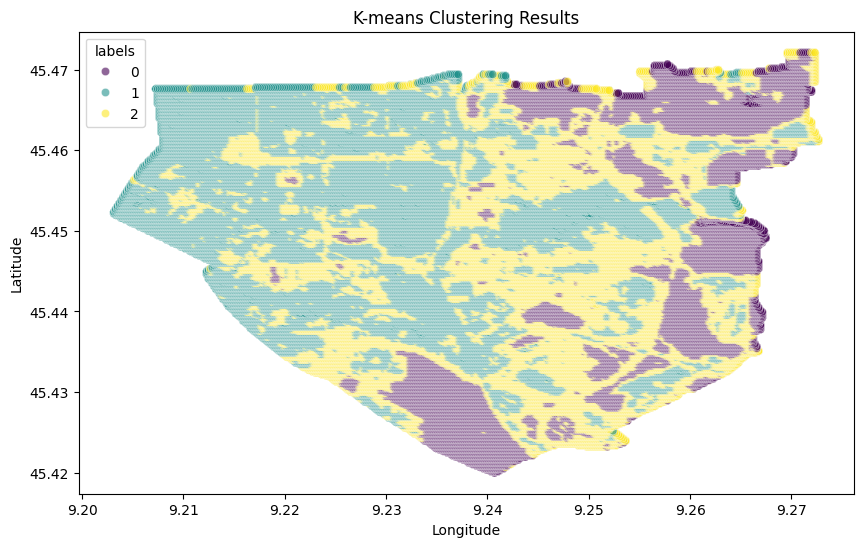

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', hue='labels', data=labeledData, palette='viridis', alpha=0.6)
plt.title('K-means Clustering Results')
plt.show()

<Figure size 1000x600 with 0 Axes>

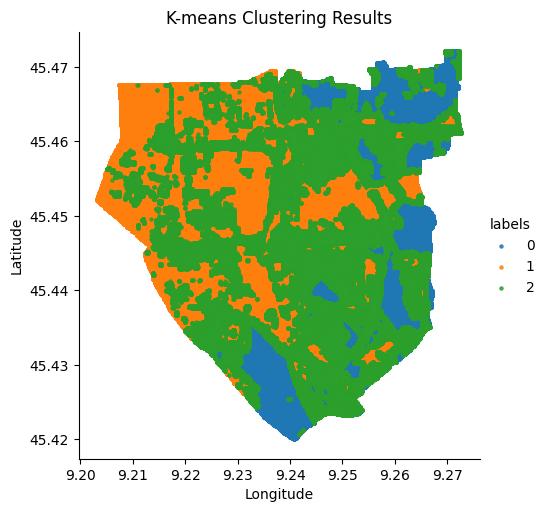

In [ ]:
plt.figure(figsize=(10, 6))
sns.lmplot(x='Longitude',y='Latitude',data=labeledData,hue='labels',fit_reg=False, scatter_kws={"s": 5})
plt.title('K-means Clustering Results')
plt.show();

### Divisive Clustering

In [ ]:
labelled_area_0 = labeledData[labeledData['labels'] == 0]
labelled_area_1 = labeledData[labeledData['labels'] == 1]
labelled_area_2 = labeledData[labeledData['labels'] == 2]

In [ ]:
labelled_area_0.shape

(170904, 17)

In [ ]:
labelled_area_1.shape

(383533, 17)

In [ ]:
labelled_area_2.shape

(314472, 17)

#### Geo-spatial Visualization of Cluster 1 (Label 0)

In [ ]:
# Standardize the features
scaler_0 = StandardScaler()
scaled_features_0 = scaler_0.fit_transform(labelled_area_0[['soil_moisture', 'NDBI', 'BU', 'Roughness', 'Slope', 'NDVI', 'LST',
       'UHI', 'UTFVI', 'NDWI', 'SAVI', 'lulc_classes', 'Amenity',
       'GHI (kWh/m2)', 'Longitude', 'Latitude']])

In [ ]:
kmeans = KMeans(n_clusters=5000, random_state=0, n_init=1, max_iter=1, tol=0).fit(scaled_features_0)

In [ ]:
centroids_0 = scaler_0.inverse_transform(kmeans.cluster_centers_)
centroids_0_df = pd.DataFrame(centroids_0[:, 14:16], columns=['longitude', 'latitude'])
centroids_0_df

,longitude,latitude
0,9.238645,45.424527
1,9.263413,45.458304
2,9.261047,45.438314
3,9.264399,45.445634
4,9.251300,45.432475
...,...,...
4995,9.256168,45.462963
4996,9.266055,45.465578
4997,9.244203,45.426097
4998,9.233408,45.429746


In [ ]:
centroids_0_df.to_csv('drive/MyDrive/Omdena-Milan/Task-1/Zone-4/centroids_0_df.csv', index=False)

In [ ]:
centroids_0_df = pd.read_csv("drive/MyDrive/Omdena-Milan/Task-1/Zone-4/centroids_0_df.csv")

In [ ]:
map_center = [centroids_0_df['latitude'].mean(), centroids_0_df['longitude'].mean()]
map = folium.Map(location=map_center, zoom_start=12)

for _, row in centroids_0_df.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']],
                        radius=5,
                        color='green',
                        fill=True,
                        fill_color='green').add_to(map)

map

Output hidden; open in https://colab.research.google.com to view.

#### Geo-spatial Visualization of Cluster 2 (Label 1)

In [ ]:
# Standardize the features
scaler_1 = StandardScaler()
scaled_features_1 = scaler_1.fit_transform(labelled_area_1[['soil_moisture', 'NDBI', 'BU', 'Roughness', 'Slope', 'NDVI', 'LST',
       'UHI', 'UTFVI', 'NDWI', 'SAVI', 'lulc_classes', 'Amenity',
       'GHI (kWh/m2)', 'Longitude', 'Latitude']])

In [ ]:
kmeans = KMeans(n_clusters=5000, random_state=0, n_init=1, max_iter=1, tol=0).fit(scaled_features_1)

In [ ]:
centroids_1 = scaler_1.inverse_transform(kmeans.cluster_centers_)
centroids_1_df = pd.DataFrame(centroids_1[:, 14:16], columns=['longitude', 'latitude'])
centroids_1_df

,longitude,latitude
0,9.210299,45.452674
1,9.230487,45.452930
2,9.231365,45.447378
3,9.216647,45.450542
4,9.221842,45.448369
...,...,...
4995,9.228401,45.454461
4996,9.220267,45.461606
4997,9.231380,45.432896
4998,9.223336,45.464106


In [ ]:
centroids_1_df.to_csv('drive/MyDrive/Omdena-Milan/Task-1/Zone-4/centroids_1_df.csv', index=False)

In [ ]:
centroids_1_df = pd.read_csv("drive/MyDrive/Omdena-Milan/Task-1/Zone-4/centroids_1_df.csv")

In [ ]:
map_center = [centroids_1_df['latitude'].mean(), centroids_1_df['longitude'].mean()]
map = folium.Map(location=map_center, zoom_start=12)

for _, row in centroids_1_df.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']],
                        radius=5,
                        color='blue',
                        fill=True,
                        fill_color='blue').add_to(map)

map

Output hidden; open in https://colab.research.google.com to view.

#### Geo-spatial Visualization of Cluster 3 (Label 2)

In [ ]:
# Standardize the features
scaler_2 = StandardScaler()
scaled_features_2 = scaler_2.fit_transform(labelled_area_2[['soil_moisture', 'NDBI', 'BU', 'Roughness', 'Slope', 'NDVI', 'LST',
       'UHI', 'UTFVI', 'NDWI', 'SAVI', 'lulc_classes', 'Amenity',
       'GHI (kWh/m2)', 'Longitude', 'Latitude']])

In [ ]:
kmeans = KMeans(n_clusters=5000, random_state=0, n_init=1, max_iter=1, tol=0).fit(scaled_features_2)

In [ ]:
centroids_2 = scaler_2.inverse_transform(kmeans.cluster_centers_)
centroids_2_df = pd.DataFrame(centroids_2[:, 14:16], columns=['longitude', 'latitude'])
centroids_2_df

,longitude,latitude
0,9.210266,45.454642
1,9.247809,45.447291
2,9.225885,45.436317
3,9.251452,45.457973
4,9.237830,45.442774
...,...,...
4995,9.240999,45.457863
4996,9.239244,45.453500
4997,9.210645,45.454671
4998,9.246186,45.427403


In [ ]:
centroids_2_df.to_csv('drive/MyDrive/Omdena-Milan/Task-1/Zone-4/centroids_2_df.csv', index=False)

In [ ]:
centroids_2_df = pd.read_csv("drive/MyDrive/Omdena-Milan/Task-1/Zone-4/centroids_2_df.csv")

In [ ]:
map_center = [centroids_2_df['latitude'].mean(), centroids_2_df['longitude'].mean()]
map = folium.Map(location=map_center, zoom_start=12)

for _, row in centroids_2_df.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']],
                        radius=5,
                        color='red',
                        fill=True,
                        fill_color='red').add_to(map)

map

Output hidden; open in https://colab.research.google.com to view.

#### Combined Geo-spatial Visualization of All the Clusters

In [ ]:
map_center = [labeledData['Latitude'].mean(), labeledData['Longitude'].mean()]
map = folium.Map(location=map_center, zoom_start=12)

for _, row in centroids_0_df.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']],
                        radius=5,
                        color='green',
                        fill=True,
                        fill_color='green').add_to(map)

for _, row in centroids_1_df.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']],
                        radius=5,
                        color='blue',
                        fill=True,
                        fill_color='blue').add_to(map)

for _, row in centroids_2_df.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']],
                        radius=5,
                        color='red',
                        fill=True,
                        fill_color='red').add_to(map)

map

Output hidden; open in https://colab.research.google.com to view.

## PCA (Principal Component Analysis)

In [ ]:
def downsample_data(data, labels, max_points=100000):
    if len(data) > max_points:
        indices = np.random.choice(len(data), max_points, replace=False)
        return data[indices], labels[indices]
    else:
        return data, labels

# Apply PCA to reduce data to 3 components
pca_3d = PCA(n_components=3)
reduced_data = pca_3d.fit_transform(scaled_features)

# Downsample the data
reduced_data, downsampled_labels = downsample_data(reduced_data, labels)

# Create a DataFrame with the reduced and downsampled data and cluster labels
df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2', 'PC3'])
df['Cluster'] = downsampled_labels

# Create a 3D scatter plot using scattergl
fig = go.Figure(data=[go.Scatter3d(
    x=df['PC1'],
    y=df['PC2'],
    z=df['PC3'],
    mode='markers',
    marker=dict(
        size=5,
        color=df['Cluster'],  # Use the cluster labels as the marker color
        colorscale='Viridis',
        opacity=0.8
    )
)])

fig.update_layout(
    title='3D PCA Cluster Visualization',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    )
)

fig.show()

Output hidden; open in https://colab.research.google.com to view.

<ipython-input-155-739361b53c81>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




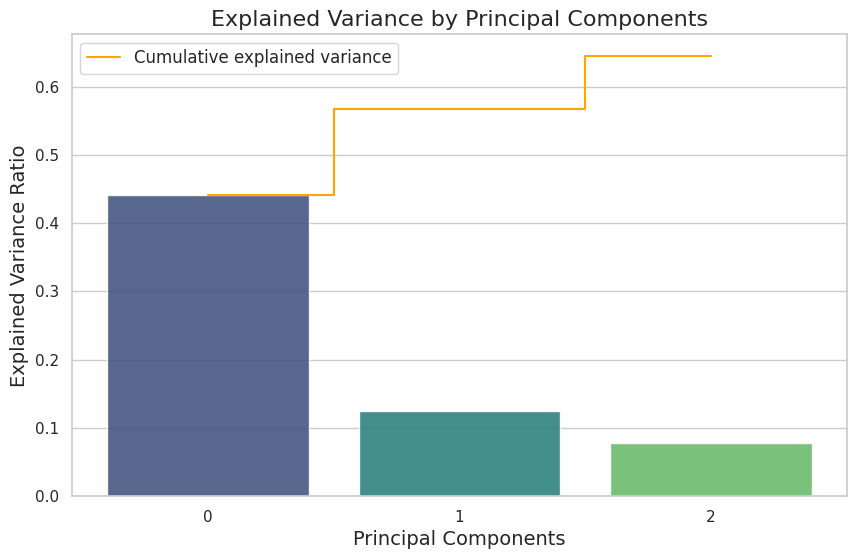

In [ ]:
sns.set(style="whitegrid")

explained_variance = pca_3d.explained_variance_ratio_

plt.figure(figsize=(10, 6))

# Bar plot for individual explained variance
sns.barplot(x=np.arange(len(explained_variance)), y=explained_variance, palette="viridis", alpha=0.9)

# Step plot for cumulative explained variance
plt.step(np.arange(len(explained_variance)), explained_variance.cumsum(), where='mid', label='Cumulative explained variance', color='orange')

plt.xlabel('Principal Components', fontsize=14)
plt.ylabel('Explained Variance Ratio', fontsize=14)
plt.title('Explained Variance by Principal Components', fontsize=16)

plt.legend(loc='best', fontsize=12)

plt.show()

# 2. With Air Quality Data


# Data Preprocessing

In [30]:
zone_4_1 = pd.read_csv("drive/MyDrive/Omdena-Milan/Task-1/Zone-4/Zone4_merged.csv")

In [ ]:
zone_4_1.head()

,latitude,longitude,GHI (kWh/m2),NDBI,NDVI,BU,slope,surface_roughness,classes,CH4_column_volume_mixing_ratio_dry_air_x,...,tropospheric_HCHO_column_number_density_y,NO2_column_number_density_y,O3_column_number_density_y,SO2_column_number_density_y,ST_B10,NDWI,soil_moisture,LandUse,Amenity,SAVI
0,45.370087,9.206070,1418.0,0.005639,0.034569,-0.028930,89.999852,818.771878,6,1906.779247,...,0.000110,0.000133,0.142803,0.000028,293.821507,-0.245300,57.342589,railway,drinking_water,0.046529
1,45.490821,9.231402,1419.9,-0.052354,0.067374,-0.119728,89.989082,818.771878,6,1907.317810,...,0.000130,0.000147,0.142105,0.000048,297.174585,-0.209471,145.803903,residential,clock,0.092720
2,45.452014,9.106896,1415.2,-0.095350,0.144253,-0.239603,89.984559,818.771878,6,1908.836942,...,0.000118,0.000139,0.142889,0.000095,298.206827,-0.136116,73.553405,residential,cafe,0.326356
3,45.427490,9.099619,1405.7,-0.038965,0.085976,-0.124941,89.993095,818.771878,6,1907.000966,...,0.000111,0.000134,0.142269,0.000087,295.226314,-0.188627,73.553405,residential,cafe,0.203799
4,45.493516,9.168880,1406.0,-0.018685,0.049283,-0.067969,89.991435,818.771878,6,1907.317810,...,0.000127,0.000147,0.141959,0.000077,295.790287,-0.209471,137.647683,residential,bank,0.078630


In [ ]:
zone_4_1.head().T

,0,1,2,3,4
latitude,45.370087,45.490821,45.452014,45.42749,45.493516
longitude,9.20607,9.231402,9.106896,9.099619,9.16888
GHI (kWh/m2),1418.0,1419.9,1415.2,1405.7,1406.0
NDBI,0.005639,-0.052354,-0.09535,-0.038965,-0.018685
NDVI,0.034569,0.067374,0.144253,0.085976,0.049283
BU,-0.02893,-0.119728,-0.239603,-0.124941,-0.067969
slope,89.999852,89.989082,89.984559,89.993095,89.991435
surface_roughness,818.771878,818.771878,818.771878,818.771878,818.771878
classes,6,6,6,6,6
CH4_column_volume_mixing_ratio_dry_air_x,1906.779247,1907.31781,1908.836942,1907.000966,1907.31781


In [ ]:
zone_4_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633543 entries, 0 to 633542
Data columns (total 27 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   latitude                                   633543 non-null  float64
 1   longitude                                  633543 non-null  float64
 2   GHI (kWh/m2)                               633543 non-null  float64
 3   NDBI                                       633543 non-null  float64
 4   NDVI                                       633543 non-null  float64
 5   BU                                         633543 non-null  float64
 6   slope                                      633543 non-null  float64
 7   surface_roughness                          633543 non-null  float64
 8   classes                                    633543 non-null  int64  
 9   CH4_column_volume_mixing_ratio_dry_air_x   633543 non-null  float64
 10  CO_colum

In [ ]:
zone_4_1.describe()

,latitude,longitude,GHI (kWh/m2),NDBI,NDVI,BU,slope,surface_roughness,classes,CH4_column_volume_mixing_ratio_dry_air_x,...,CH4_column_volume_mixing_ratio_dry_air_y,CO_column_number_density_y,tropospheric_HCHO_column_number_density_y,NO2_column_number_density_y,O3_column_number_density_y,SO2_column_number_density_y,ST_B10,NDWI,soil_moisture,SAVI
count,633543.000000,633543.000000,633543.000000,633543.000000,633543.000000,633543.000000,633543.000000,6.335430e+05,633543.0,633543.000000,...,633543.000000,633543.000000,633543.000000,633543.000000,633543.000000,633543.000000,633543.000000,633543.000000,633543.000000,633543.000000
mean,45.445007,9.223587,1415.822807,-0.079887,0.115607,-0.195494,86.182488,8.187719e+02,6.0,1907.414922,...,1907.414922,0.034053,0.000121,0.000138,0.142272,0.000063,295.532516,-0.261046,103.735990,0.103412
std,0.052046,0.073673,7.107390,0.049158,0.058124,0.101584,18.119102,9.094954e-13,0.0,0.696601,...,0.696601,0.000159,0.000011,0.000006,0.000220,0.000031,2.376361,0.085872,55.836384,0.082524
min,45.354995,9.096116,1405.300000,-0.257022,-0.056044,-0.645894,0.000000,8.187719e+02,6.0,1905.052795,...,1905.052795,0.033725,0.000107,0.000131,0.141864,-0.000039,287.299925,-0.599968,-4.064589,-0.006586
25%,45.400001,9.159717,1409.000000,-0.116568,0.069537,-0.265725,89.986189,8.187719e+02,6.0,1906.805351,...,1906.805351,0.033942,0.000111,0.000133,0.142105,0.000029,293.794163,-0.280279,73.553405,0.047695
50%,45.445007,9.223587,1415.600000,-0.084380,0.108948,-0.194187,89.992510,8.187719e+02,6.0,1907.328162,...,1907.328162,0.034003,0.000119,0.000136,0.142335,0.000073,295.790287,-0.239865,94.813475,0.069582
75%,45.490012,9.287457,1422.600000,-0.045897,0.150880,-0.115572,89.999852,8.187719e+02,6.0,1907.743408,...,1907.743408,0.034242,0.000130,0.000143,0.142418,0.000095,297.342068,-0.209471,133.568970,0.087442
max,45.535018,9.351058,1428.000000,0.204732,0.393242,0.144693,89.999861,8.187719e+02,6.0,1908.963417,...,1908.963417,0.034344,0.000149,0.000147,0.142899,0.000109,307.121023,0.111039,1754.709935,0.488868


In [ ]:
zone_4_1.columns

Index(['latitude', 'longitude', 'GHI (kWh/m2)', 'NDBI', 'NDVI', 'BU', 'slope',
       'surface_roughness', 'classes',
       'CH4_column_volume_mixing_ratio_dry_air_x',
       'CO_column_number_density_x',
       'tropospheric_HCHO_column_number_density_x',
       'NO2_column_number_density_x', 'O3_column_number_density_x',
       'SO2_column_number_density_x',
       'CH4_column_volume_mixing_ratio_dry_air_y',
       'CO_column_number_density_y',
       'tropospheric_HCHO_column_number_density_y',
       'NO2_column_number_density_y', 'O3_column_number_density_y',
       'SO2_column_number_density_y', 'ST_B10', 'NDWI', 'soil_moisture',
       'LandUse', 'Amenity', 'SAVI'],
      dtype='object')

In [ ]:
zone_4_1.shape

(633543, 27)

In [ ]:
print("Total number of Columns:", zone_4_1.shape[1],"\nTotal number of Rows:", zone_4_1.shape[0])

Total number of Columns: 27 
Total number of Rows: 633543


In [ ]:
zone_4_1.isnull().sum() #checking for total null values

latitude                                     0
longitude                                    0
GHI (kWh/m2)                                 0
NDBI                                         0
NDVI                                         0
BU                                           0
slope                                        0
surface_roughness                            0
classes                                      0
CH4_column_volume_mixing_ratio_dry_air_x     0
CO_column_number_density_x                   0
tropospheric_HCHO_column_number_density_x    0
NO2_column_number_density_x                  0
O3_column_number_density_x                   0
SO2_column_number_density_x                  0
CH4_column_volume_mixing_ratio_dry_air_y     0
CO_column_number_density_y                   0
tropospheric_HCHO_column_number_density_y    0
NO2_column_number_density_y                  0
O3_column_number_density_y                   0
SO2_column_number_density_y                  0
ST_B10       

In [31]:
# Encode the categorical column
zone_4_1['Amenity'] = pd.Categorical(zone_4_1['Amenity']).codes
# Encode the categorical column
zone_4_1['LandUse'] = pd.Categorical(zone_4_1['LandUse']).codes

In [ ]:
zone_4_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633543 entries, 0 to 633542
Data columns (total 27 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   latitude                                   633543 non-null  float64
 1   longitude                                  633543 non-null  float64
 2   GHI (kWh/m2)                               633543 non-null  float64
 3   NDBI                                       633543 non-null  float64
 4   NDVI                                       633543 non-null  float64
 5   BU                                         633543 non-null  float64
 6   slope                                      633543 non-null  float64
 7   surface_roughness                          633543 non-null  float64
 8   classes                                    633543 non-null  int64  
 9   CH4_column_volume_mixing_ratio_dry_air_x   633543 non-null  float64
 10  CO_colum

## Normalization

In [32]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(zone_4_1[['latitude', 'longitude', 'GHI (kWh/m2)', 'NDBI', 'NDVI', 'BU', 'slope',
       'surface_roughness', 'classes',
       'CH4_column_volume_mixing_ratio_dry_air_x',
       'CO_column_number_density_x',
       'tropospheric_HCHO_column_number_density_x',
       'NO2_column_number_density_x', 'O3_column_number_density_x',
       'SO2_column_number_density_x',
       'CH4_column_volume_mixing_ratio_dry_air_y',
       'CO_column_number_density_y',
       'tropospheric_HCHO_column_number_density_y',
       'NO2_column_number_density_y', 'O3_column_number_density_y',
       'SO2_column_number_density_y', 'ST_B10', 'NDWI', 'soil_moisture',
       'LandUse', 'Amenity', 'SAVI']])
scaled_features

array([[-1.43949376, -0.23776846,  0.30632825, ...,  0.28166868,
         0.10644342, -0.68928991],
       [ 0.88026597,  0.10608131,  0.57365585, ...,  0.88930156,
        -0.19172644, -0.1295588 ],
       [ 0.13462891, -1.58390373, -0.0876282 , ...,  0.88930156,
        -0.60916425,  2.70155707],
       ...,
       [-0.26925783, -0.6474618 , -0.49565452, ...,  0.88930156,
        -0.60916425, -0.48245452],
       [ 1.00971685, -0.63648787, -0.00320896, ...,  0.88930156,
        -0.96696808,  0.83772691],
       [ 1.06667523,  0.98399562, -0.14390769, ..., -1.94631855,
        -0.54953028, -0.67515934]])

# Modelling


## K-Means Clustering
### Elbow Method

In [33]:
inertia = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(scaled_features)
    kmeanModel.fit(scaled_features)
    inertia.append(kmeanModel.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

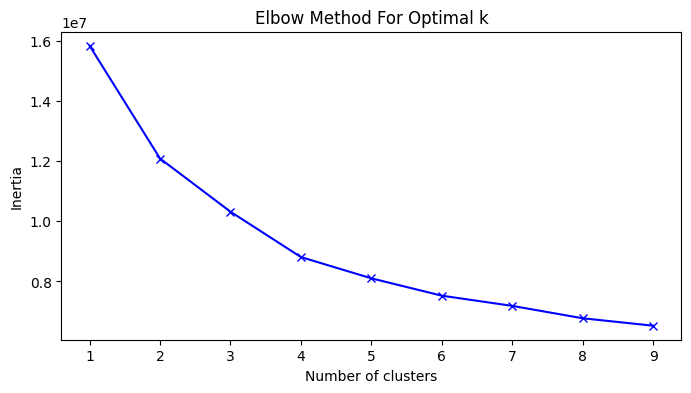

In [34]:
# Plot the elbow method results
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [35]:
# From the elbow plot, choosing the optimal number of clusters:
optimal_clusters = 3

In [36]:
kmeans = KMeans(n_clusters=optimal_clusters).fit(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Evaluation

In [37]:
inertia_2 = kmeans.inertia_
print(f"Inertia: {inertia_2}")

Inertia: 10319377.039444521


In [38]:
labels = kmeans.labels_

In [39]:
ch_score_2 = calinski_harabasz_score(scaled_features, labels)
print(f"Calinski-Harabasz Index: {ch_score_2}")

Calinski-Harabasz Index: 169420.7349112979


In [40]:
db_score_2 = davies_bouldin_score(scaled_features, labels)
print(f"Davies-Bouldin Index: {db_score_2}")

Davies-Bouldin Index: 1.4314703293575715


In [ ]:
labels_df = pd.DataFrame(kmeans.labels_) #This is where the label output of the KMeans we just ran lives. Make it a dataframe so we can concatenate back to the original data
labeledData = pd.concat((zone_4_1,labels_df),axis=1)
labeledData = labeledData.rename({0:'labels'},axis=1)

In [ ]:
labeledData.to_csv('drive/MyDrive/Omdena-Milan/Task-1/Zone-4/labeledData_v2.csv', index=False)

In [ ]:
labeledData = pd.read_csv("drive/MyDrive/Omdena-Milan/Task-1/Zone-4/labeledData_v2.csv")

In [ ]:
labeledData

,latitude,longitude,GHI (kWh/m2),NDBI,NDVI,BU,slope,surface_roughness,classes,CH4_column_volume_mixing_ratio_dry_air_x,...,NO2_column_number_density_y,O3_column_number_density_y,SO2_column_number_density_y,ST_B10,NDWI,soil_moisture,LandUse,Amenity,SAVI,labels
0,45.370087,9.206070,1418.0,0.005639,0.034569,-0.028930,89.999852,818.771878,6,1906.779247,...,0.000133,0.142803,0.000028,293.821507,-0.245300,57.342589,16,22,0.046529,2
1,45.490821,9.231402,1419.9,-0.052354,0.067374,-0.119728,89.989082,818.771878,6,1907.317810,...,0.000147,0.142105,0.000048,297.174585,-0.209471,145.803903,19,17,0.092720,0
2,45.452014,9.106896,1415.2,-0.095350,0.144253,-0.239603,89.984559,818.771878,6,1908.836942,...,0.000139,0.142889,0.000095,298.206827,-0.136116,73.553405,19,10,0.326356,2
3,45.427490,9.099619,1405.7,-0.038965,0.085976,-0.124941,89.993095,818.771878,6,1907.000966,...,0.000134,0.142269,0.000087,295.226314,-0.188627,73.553405,19,10,0.203799,2
4,45.493516,9.168880,1406.0,-0.018685,0.049283,-0.067969,89.991435,818.771878,6,1907.317810,...,0.000147,0.141959,0.000077,295.790287,-0.209471,137.647683,19,4,0.078630,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633538,45.503756,9.208226,1408.5,-0.096205,0.118166,-0.214371,89.969118,818.771878,6,1907.708570,...,0.000147,0.141972,0.000073,295.089593,-0.209471,97.841683,19,37,0.045018,0
633539,45.461446,9.270479,1409.9,-0.073435,0.129124,-0.202559,89.986189,818.771878,6,1908.117493,...,0.000139,0.142337,0.000109,297.581329,-0.411476,87.943419,11,11,0.035786,1
633540,45.430993,9.175886,1412.3,-0.051878,0.090994,-0.142873,89.993095,818.771878,6,1907.000966,...,0.000134,0.142269,0.000087,296.877217,-0.274505,73.553405,19,10,0.063598,2
633541,45.497558,9.176695,1415.8,-0.112276,0.086507,-0.198783,89.989706,818.771878,6,1907.317810,...,0.000147,0.141959,0.000077,295.790287,-0.209471,137.647683,19,4,0.172545,0


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


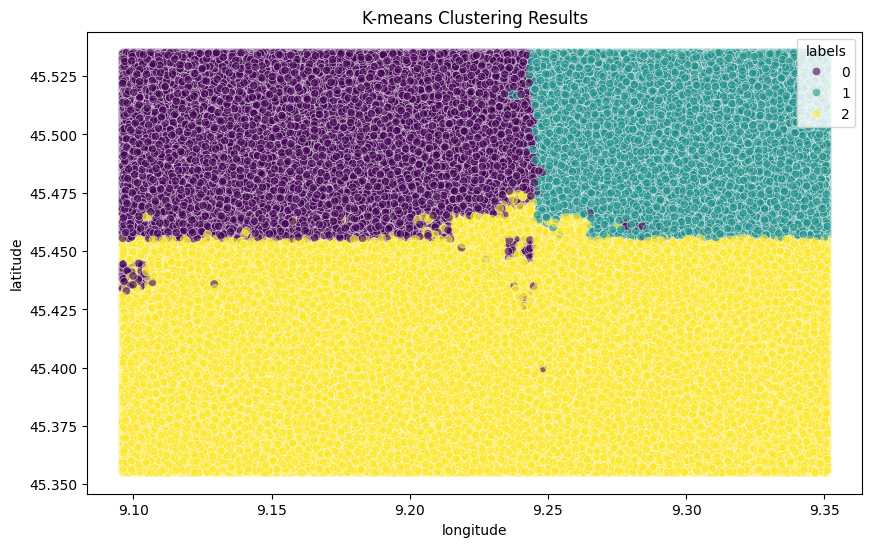

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='labels', data=labeledData, palette='viridis', alpha=0.6)
plt.title('K-means Clustering Results')
plt.show()

<Figure size 1000x600 with 0 Axes>

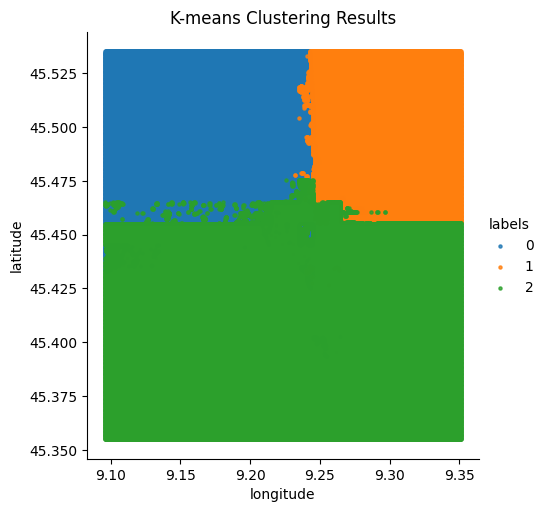

In [ ]:
plt.figure(figsize=(10, 6))
sns.lmplot(x='longitude',y='latitude',data=labeledData,hue='labels',fit_reg=False, scatter_kws={"s": 5})
plt.title('K-means Clustering Results')
plt.show()

### Divisive Clustering

In [ ]:
labelled_area_0 = labeledData[labeledData['labels'] == 0]
labelled_area_1 = labeledData[labeledData['labels'] == 1]
labelled_area_2 = labeledData[labeledData['labels'] == 2]

In [ ]:
labelled_area_0.shape

(160412, 28)

In [ ]:
labelled_area_1.shape

(114647, 28)

In [ ]:
labelled_area_2.shape

(358484, 28)

#### Geo-spatial Visualization of Cluster 1 (Label 0)

In [ ]:
# Standardize the features
scaler_0 = StandardScaler()
scaled_features_0 = scaler_0.fit_transform(labelled_area_0[['latitude', 'longitude', 'GHI (kWh/m2)', 'NDBI', 'NDVI', 'BU', 'slope',
       'surface_roughness', 'classes',
       'CH4_column_volume_mixing_ratio_dry_air_x',
       'CO_column_number_density_x',
       'tropospheric_HCHO_column_number_density_x',
       'NO2_column_number_density_x', 'O3_column_number_density_x',
       'SO2_column_number_density_x',
       'CH4_column_volume_mixing_ratio_dry_air_y',
       'CO_column_number_density_y',
       'tropospheric_HCHO_column_number_density_y',
       'NO2_column_number_density_y', 'O3_column_number_density_y',
       'SO2_column_number_density_y', 'ST_B10', 'NDWI', 'soil_moisture',
       'LandUse', 'Amenity', 'SAVI']])

In [ ]:
kmeans = KMeans(n_clusters=5000, random_state=0, n_init=1, max_iter=1, tol=0).fit(scaled_features_0)

In [ ]:
centroids_0 = scaler_0.inverse_transform(kmeans.cluster_centers_)
centroids_0_df = pd.DataFrame(centroids_0[:, 0:2], columns=['latitude', 'longitude'])
centroids_0_df

,latitude,longitude
0,45.530414,9.099306
1,45.515939,9.177242
2,45.461760,9.171080
3,45.505014,9.238349
4,45.473436,9.137272
...,...,...
4995,45.474286,9.138157
4996,45.507109,9.231510
4997,45.527229,9.198425
4998,45.520379,9.221226


In [ ]:
centroids_0_df.to_csv('drive/MyDrive/Omdena-Milan/Task-1/Zone-4/centroids_0_df_v2.csv', index=False)

In [ ]:
centroids_0_df = pd.read_csv("drive/MyDrive/Omdena-Milan/Task-1/Zone-4/centroids_0_df_v2.csv")

In [ ]:
map_center = [centroids_0_df['latitude'].mean(), centroids_0_df['longitude'].mean()]
map = folium.Map(location=map_center, zoom_start=12)

for _, row in centroids_0_df.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']],
                        radius=5,
                        color='green',
                        fill=True,
                        fill_color='green').add_to(map)

map

Output hidden; open in https://colab.research.google.com to view.

#### Geo-spatial Visualization of Cluster 2 (Label 1)

In [ ]:
# Standardize the features
scaler_1 = StandardScaler()
scaled_features_1 = scaler_1.fit_transform(labelled_area_1[['soil_moisture', 'NDBI', 'BU', 'Roughness', 'Slope', 'NDVI', 'LST',
       'UHI', 'UTFVI', 'NDWI', 'SAVI', 'lulc_classes', 'Amenity',
       'GHI (kWh/m2)', 'Longitude', 'Latitude']])

In [ ]:
# Standardize the features
scaler_1 = StandardScaler()
scaled_features_1 = scaler_1.fit_transform(labelled_area_1[['latitude', 'longitude', 'GHI (kWh/m2)', 'NDBI', 'NDVI', 'BU', 'slope',
       'surface_roughness', 'classes',
       'CH4_column_volume_mixing_ratio_dry_air_x',
       'CO_column_number_density_x',
       'tropospheric_HCHO_column_number_density_x',
       'NO2_column_number_density_x', 'O3_column_number_density_x',
       'SO2_column_number_density_x',
       'CH4_column_volume_mixing_ratio_dry_air_y',
       'CO_column_number_density_y',
       'tropospheric_HCHO_column_number_density_y',
       'NO2_column_number_density_y', 'O3_column_number_density_y',
       'SO2_column_number_density_y', 'ST_B10', 'NDWI', 'soil_moisture',
       'LandUse', 'Amenity', 'SAVI']])

In [ ]:
kmeans = KMeans(n_clusters=5000, random_state=0, n_init=1, max_iter=1, tol=0).fit(scaled_features_1)

In [ ]:
centroids_1 = scaler_1.inverse_transform(kmeans.cluster_centers_)
centroids_1_df = pd.DataFrame(centroids_1[:, 0:2], columns=['latitude', 'longitude'])
centroids_1_df

,latitude,longitude
0,45.499833,9.269649
1,45.511116,9.321227
2,45.470671,9.303378
3,45.490086,9.253182
4,45.495445,9.262486
...,...,...
4995,45.471417,9.313957
4996,45.466027,9.265628
4997,45.476430,9.342200
4998,45.481445,9.291735


In [ ]:
centroids_1_df.to_csv('drive/MyDrive/Omdena-Milan/Task-1/Zone-4/centroids_1_df_v2.csv', index=False)

In [ ]:
centroids_1_df = pd.read_csv("drive/MyDrive/Omdena-Milan/Task-1/Zone-4/centroids_1_df_v2.csv")

In [ ]:
map_center = [centroids_1_df['latitude'].mean(), centroids_1_df['longitude'].mean()]
map = folium.Map(location=map_center, zoom_start=12)

for _, row in centroids_1_df.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']],
                        radius=5,
                        color='blue',
                        fill=True,
                        fill_color='blue').add_to(map)

map

Output hidden; open in https://colab.research.google.com to view.

#### Geo-spatial Visualization of Cluster 3 (Label 2)

In [ ]:
# Standardize the features
scaler_2 = StandardScaler()
scaled_features_2 = scaler_2.fit_transform(labelled_area_2[['latitude', 'longitude', 'GHI (kWh/m2)', 'NDBI', 'NDVI', 'BU', 'slope',
       'surface_roughness', 'classes',
       'CH4_column_volume_mixing_ratio_dry_air_x',
       'CO_column_number_density_x',
       'tropospheric_HCHO_column_number_density_x',
       'NO2_column_number_density_x', 'O3_column_number_density_x',
       'SO2_column_number_density_x',
       'CH4_column_volume_mixing_ratio_dry_air_y',
       'CO_column_number_density_y',
       'tropospheric_HCHO_column_number_density_y',
       'NO2_column_number_density_y', 'O3_column_number_density_y',
       'SO2_column_number_density_y', 'ST_B10', 'NDWI', 'soil_moisture',
       'LandUse', 'Amenity', 'SAVI']])

In [ ]:
kmeans = KMeans(n_clusters=5000, random_state=0, n_init=1, max_iter=1, tol=0).fit(scaled_features_2)

In [ ]:
centroids_2 = scaler_2.inverse_transform(kmeans.cluster_centers_)
centroids_2_df = pd.DataFrame(centroids_2[:, 0:2], columns=['latitude', 'longitude'])
centroids_2_df

,latitude,longitude
0,45.381771,9.162481
1,45.390960,9.311275
2,45.449642,9.152494
3,45.444148,9.283712
4,45.369249,9.168596
...,...,...
4995,45.429250,9.111823
4996,45.384940,9.124263
4997,45.456382,9.246629
4998,45.410148,9.266695


In [ ]:
centroids_2_df.to_csv('drive/MyDrive/Omdena-Milan/Task-1/Zone-4/centroids_2_df_v2.csv', index=False)

In [ ]:
centroids_2_df = pd.read_csv("drive/MyDrive/Omdena-Milan/Task-1/Zone-4/centroids_2_df_v2.csv")

In [ ]:
map_center = [centroids_2_df['latitude'].mean(), centroids_2_df['longitude'].mean()]
map = folium.Map(location=map_center, zoom_start=12)

for _, row in centroids_2_df.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']],
                        radius=5,
                        color='red',
                        fill=True,
                        fill_color='red').add_to(map)

map

Output hidden; open in https://colab.research.google.com to view.

#### Combined Geo-spatial Visualization of all the Clusters

In [ ]:
map_center = [labeledData['latitude'].mean(), labeledData['longitude'].mean()]
map = folium.Map(location=map_center, zoom_start=12)

for _, row in centroids_0_df.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']],
                        radius=5,
                        color='green',
                        fill=True,
                        fill_color='green').add_to(map)

for _, row in centroids_1_df.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']],
                        radius=5,
                        color='blue',
                        fill=True,
                        fill_color='blue').add_to(map)

for _, row in centroids_2_df.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']],
                        radius=5,
                        color='red',
                        fill=True,
                        fill_color='red').add_to(map)

map

Output hidden; open in https://colab.research.google.com to view.

## PCA (Principal Component Analysis)

In [ ]:
def downsample_data(data, labels, max_points=100000):
    if len(data) > max_points:
        indices = np.random.choice(len(data), max_points, replace=False)
        return data[indices], labels[indices]
    else:
        return data, labels

# Apply PCA to reduce data to 3 components
pca_3d = PCA(n_components=3)
reduced_data = pca_3d.fit_transform(scaled_features)

# Downsample the data
reduced_data, downsampled_labels = downsample_data(reduced_data, labels)

# Create a DataFrame with the reduced and downsampled data and cluster labels
df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2', 'PC3'])
df['Cluster'] = downsampled_labels

# Create a 3D scatter plot using scattergl
fig = go.Figure(data=[go.Scatter3d(
    x=df['PC1'],
    y=df['PC2'],
    z=df['PC3'],
    mode='markers',
    marker=dict(
        size=5,
        color=df['Cluster'],  # Use the cluster labels as the marker color
        colorscale='Viridis',
        opacity=0.8
    )
)])

fig.update_layout(
    title='3D PCA Cluster Visualization',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    )
)

fig.show()

Output hidden; open in https://colab.research.google.com to view.

<ipython-input-148-7092dbd29edd>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




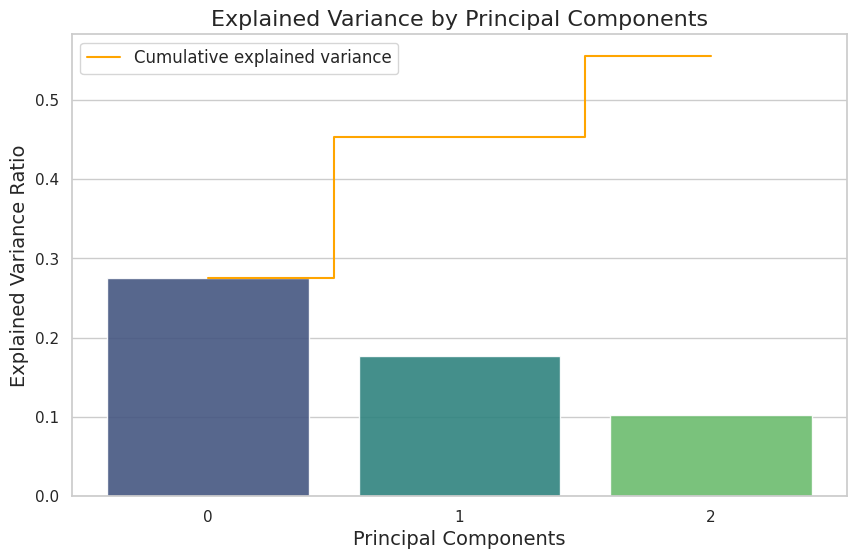

In [ ]:
sns.set(style="whitegrid")

explained_variance = pca_3d.explained_variance_ratio_

plt.figure(figsize=(10, 6))

# Bar plot for individual explained variance
sns.barplot(x=np.arange(len(explained_variance)), y=explained_variance, palette="viridis", alpha=0.9)

# Step plot for cumulative explained variance
plt.step(np.arange(len(explained_variance)), explained_variance.cumsum(), where='mid', label='Cumulative explained variance', color='orange')

plt.xlabel('Principal Components', fontsize=14)
plt.ylabel('Explained Variance Ratio', fontsize=14)
plt.title('Explained Variance by Principal Components', fontsize=16)

plt.legend(loc='best', fontsize=12)

plt.show()

# Comparison

<ipython-input-41-819b35b610f6>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Score', data=df[df['Metric'] == metric], ax=ax, palette='viridis')
<ipython-input-41-819b35b610f6>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Score', data=df[df['Metric'] == metric], ax=ax, palette='viridis')
<ipython-input-41-819b35b610f6>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Score', data=df[df['Metric'] == metric], ax=ax, palette='viridis')


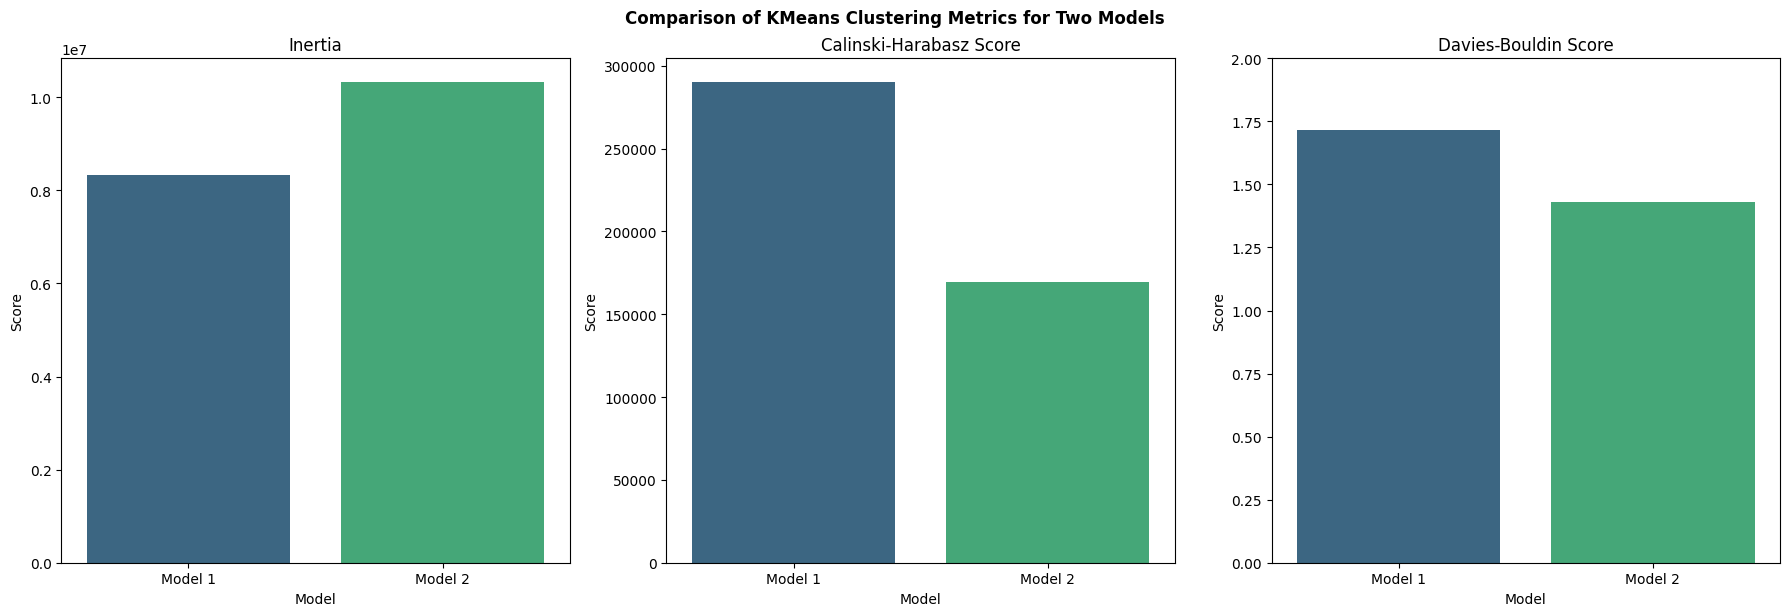

In [41]:
# Example data for two models
data = {
    'Metric': ['Inertia', 'Calinski-Harabasz Score', 'Davies-Bouldin Score'] * 2,
    'Score': [inertia_1, ch_score_1, db_score_1, inertia_2, ch_score_2, db_score_2],
    'Model': ['Model 1'] * 3 + ['Model 2'] * 3
}

df = pd.DataFrame(data)

# Set up the figure and axes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# List of metrics
metrics = ['Inertia', 'Calinski-Harabasz Score', 'Davies-Bouldin Score']

# Plot each metric in a separate subplot
for ax, metric in zip(axes, metrics):
    sns.barplot(x='Model', y='Score', data=df[df['Metric'] == metric], ax=ax, palette='viridis')
    ax.set_title(metric)
    ax.set_xlabel('Model')
    ax.set_ylabel('Score')
    if metric == 'Davies-Bouldin Score':
        ax.set_ylim(0, 2)  # Adjusting the y-axis limit for better visibility

# Adjust layout
plt.tight_layout()
plt.suptitle('Comparison of KMeans Clustering Metrics for Two Models', fontweight='bold', y=1.02)
plt.show()